# House prices data


1. Import `numpy` and `pandas`

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

2. Import dataset

In [ ]:
# Load the dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

 **Dataset Source**:  
- This dataset is available from [Selva Prabhakaran’s dataset repository](https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv).
- More details can be found in the **UCI Machine Learning Repository**:  
  🔗 [Boston Housing Dataset on UCI](https://archive.ics.uci.edu/ml/datasets/)

- Each row represents a house in Boston.  
- Columns include information about **crime rate**, **number of rooms**, **proximity to highways**, **property tax rate**, and more.  
- The target variable is **median house price (`medv`)**.


In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


3. Remove NaN

In [ ]:
# Remove missing values if any
df = df.dropna()

4. Using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html" target="_blank">`select_dtypes`</a> from Pandas, filter out all categorical variables. Then, remove the target variable 'medv'

In [ ]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('medv')  # Remove the target variable

print("Selected Numerical Features for PCA")
print(numerical_cols)

Selected Numerical Features for PCA
['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']


5. Standardize the Data

In [ ]:
# Standardize the data
scaler = StandardScaler()
scaler.fit_transform(df[numerical_cols])

print("Data after Standardization (First 5 rows)")
pd.DataFrame(df_scaled, columns=numerical_cols).head()


Data after Standardization (First 5 rows)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


6. Apply PCA on your normalized train set.
> NB: specify `n_components=13`

In [ ]:
# Apply PCA
pca = PCA(n_components=13, random_state=42)
principal_components = pca.fit_transform(df_scaled)

# Convert to DataFrame
pca_df = pd.DataFrame(principal_components, index=df.index, columns=[f"PC{i+1}" for i in range(13)])

print("First 5 Rows of Principal Components")
pca_df.head()


First 5 Rows of Principal Components


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-2.098297,0.773113,0.342943,-0.891774,-0.423070,0.315338,0.318641,-0.295832,-0.424937,-0.640206,0.033000,0.019440,0.365975
1,-1.457252,0.591985,-0.695199,-0.487459,0.195876,-0.264223,0.553861,0.223670,-0.166962,-0.084236,0.640810,-0.125797,-0.070719
2,-2.074598,0.599639,0.167122,-0.739204,0.934534,-0.448095,0.484560,-0.105166,0.069775,0.180380,0.487557,0.133327,-0.014022
3,-2.611504,-0.006871,-0.100284,-0.343721,1.104956,-0.664649,0.622641,-0.255941,-0.342246,-0.045901,0.360209,0.508678,0.007847
4,-2.458185,0.097712,-0.075348,-0.427907,1.065924,-0.617047,0.705086,0.134524,-0.417668,0.140880,0.395150,0.497732,0.014274


7. Compute Explained Variance

In [ ]:
explained_variance = pca.explained_variance_ratio_
cum_variance = np.cumsum(explained_variance)

print("Explained Variance Ratio per Component")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.2%}")


Explained Variance Ratio per Component
PC1: 47.13%
PC2: 11.03%
PC3: 9.56%
PC4: 6.60%
PC5: 6.42%
PC6: 5.06%
PC7: 4.12%
PC8: 3.05%
PC9: 2.13%
PC10: 1.69%
PC11: 1.43%
PC12: 1.30%
PC13: 0.49%


8. Create a Scree Plot to choose how many components we keep
- How many principal components would you select based on this plot?

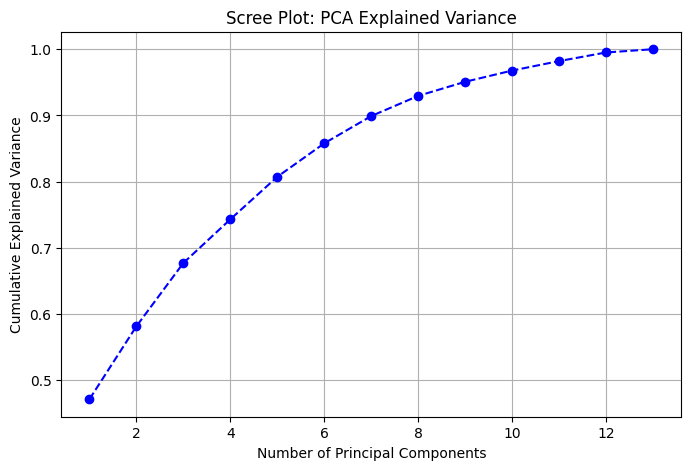

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), cum_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot: PCA Explained Variance')
plt.grid()
plt.show()


9. Visualize Feature Contributions with a Correlation Circle
  
- Which features contribute the most to PC1 and PC2?  
- Are there any features that are strongly correlated in this representation?  


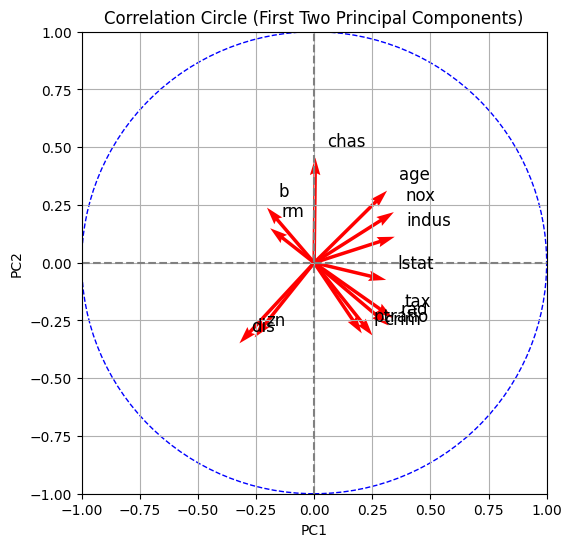

In [ ]:
# Task: Correlation Circle (Loadings Plot)
fig, ax = plt.subplots(figsize=(6,6))

# Get component loadings
coords = pca.components_[:2, :].T  # First two components
ax.quiver(np.zeros(coords.shape[0]), np.zeros(coords.shape[0]), coords[:, 0], coords[:, 1], angles='xy', scale_units='xy', scale=1, color='r')

# Add feature names
for i, feature in enumerate(numerical_cols):
    plt.text(coords[i, 0] + 0.05, coords[i, 1] + 0.05, feature, fontsize=12)

# Add unit circle
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='dashed')
ax.add_patch(circle)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.title('Correlation Circle (First Two Principal Components)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()


10. Scatter Plot of the First Two Principal Components
* Use `sns.scatterplot` to plot **PC1 vs. PC2**.  
* Set the `hue` parameter to **age** so that individuals are colored based on their age.  
- Can you identify any clusters in the data?  

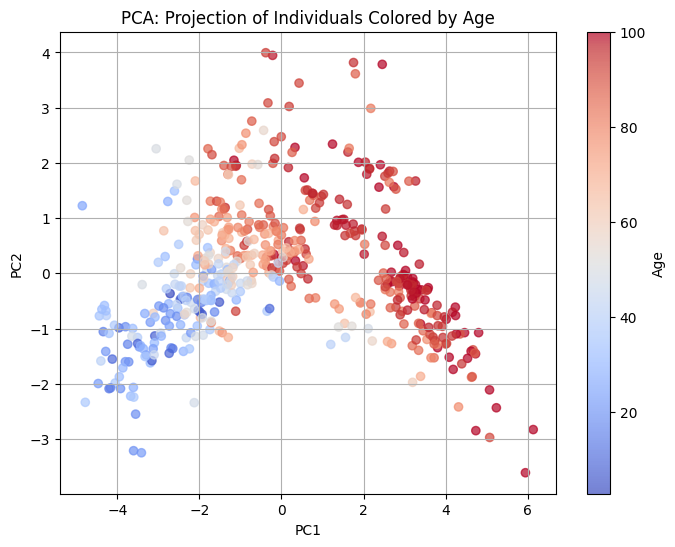

In [ ]:
# Task: Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df["PC1"], pca_df["PC2"], c=df["age"], cmap="coolwarm", alpha=0.7)
plt.colorbar(scatter, label="Age")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: Projection of Individuals Colored by Age')
plt.grid()
plt.show()

